Итоговая работа

# 1.Загрузить файл hr.csv

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind as ttest


In [141]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [2]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
#среднее
hr.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [5]:
#медиана
hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
#мода
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#минимум
hr.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [8]:
#максимум
hr.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [9]:
#стандартное отклонение
hr.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных

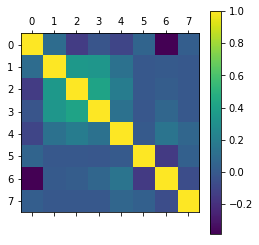

In [10]:
plt.matshow(hr.corr())
plt.colorbar()
plt.show()

# 4.Визуализировать несколько взаимосвязей между переменными

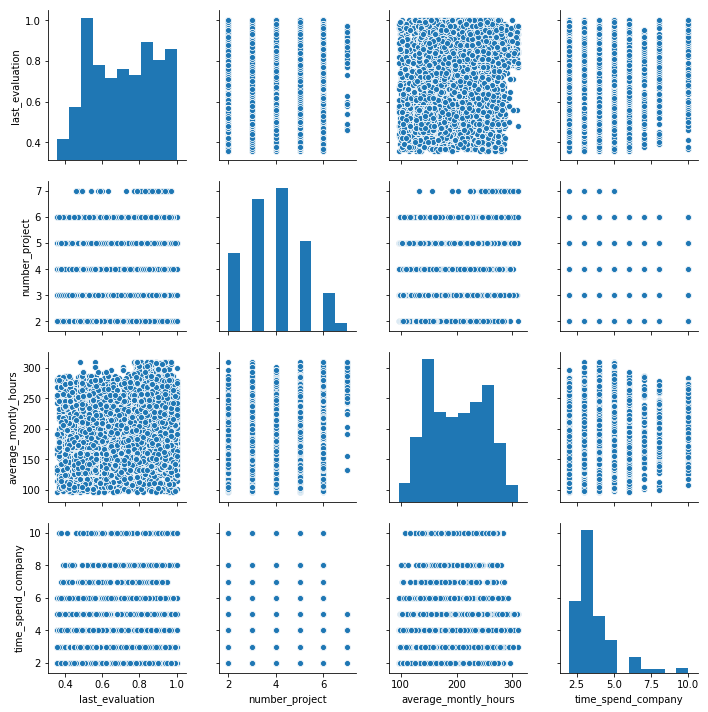

In [11]:
sns_plot = sns.pairplot(
    hr[['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]);
sns_plot

# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [12]:
ttest(hr['satisfaction_level'].values,hr['left'].values)

Ttest_indResult(statistic=93.06077566920372, pvalue=0.0)

In [13]:
ttest(hr['number_project'].values,hr['time_spend_company'].values)

Ttest_indResult(statistic=19.536753519083355, pvalue=1.7938911515379e-84)

In [14]:
ttest(hr['left'].values,hr['Work_accident'].values)

Ttest_indResult(statistic=20.724471296371643, pvalue=9.625063899986344e-95)

# 6.Рассчитать сколько работников работает в каждом департаменте.

In [37]:
# значение 0 в колонке left означает, что сотрудник работает на данный момент
hr_working = hr[hr['left'] == 0].sort_values('sales', ascending=False)
hr_working.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
4410,0.83,0.85,4,261,3,0,0,0,technical,low
13007,1.00,0.55,4,186,4,1,0,0,technical,medium
10439,0.23,0.64,3,228,4,1,0,0,technical,medium
8248,0.97,0.86,5,222,3,0,0,0,technical,low
10460,1.00,0.89,3,230,3,1,0,0,technical,low


In [108]:
hr_working.groupby(['sales'],sort=True).size()

sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
dtype: int64

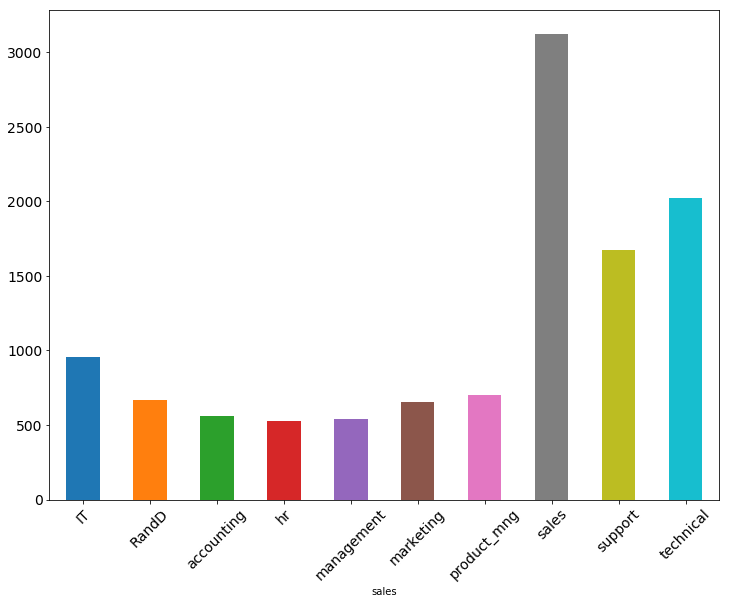

In [142]:
#для пущей красивости визуализируем :)
hr_working.groupby(['sales'],sort=True).size().plot(kind='bar', rot=45, fontsize=14, stacked=False)

# 7.Показать распределение сотрудников по зарплатам.

In [40]:
salary = hr.groupby(['salary']).count()
salary

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales
salary,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446


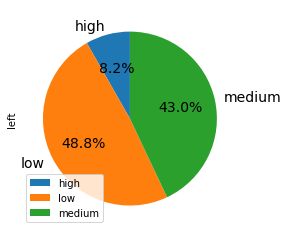

In [41]:
salary['left'].plot(kind='pie', autopct='%1.1f%%', 
                                 startangle=90, shadow=False, legend = True, fontsize=14)

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [20]:
salary_dep = hr.groupby(['sales', 'salary']).count()
salary_dep.head()

satisfaction_level  last_evaluation  number_project  \
sales salary                                                        
IT    high                    83               83              83   
      low                    609              609             609   
      medium                 535              535             535   
RandD high                    51               51              51   
      low                    364              364             364   

              average_montly_hours  time_spend_company  Work_accident  left  \
sales salary                                                                  
IT    high                      83                  83             83    83   
      low                      609                 609            609   609   
      medium                   535                 535            535   535   
RandD high                      51                  51             51    51   
      low                      364                 364            364   364   

              promotion_last_5years  
sales salary                         
IT    high                       83  
      low                       609  
      medium                    535  
RandD high                       51  
      low                       364

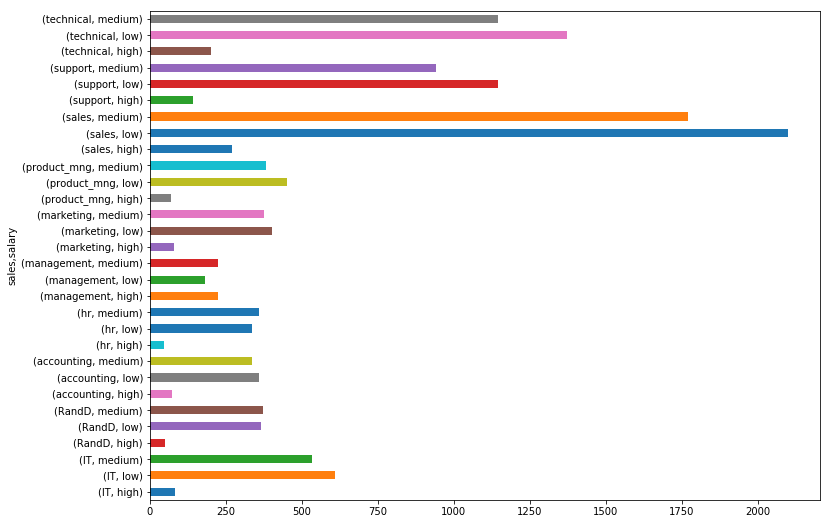

In [143]:
salary_dep.groupby(['salary'],sort=True).size()
salary_dep['left'].plot(kind='barh', rot=0, stacked=False)

# так как на "общем" граффике получилось наглядно, но все равно каша, то сделаю визуализацию по каждому департаменту 

Text(0.5, 1.0, 'IT')

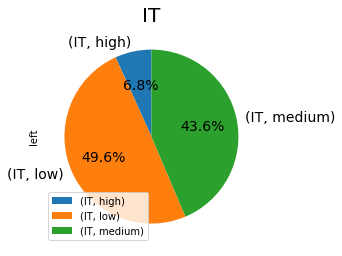

In [46]:
hr_IT = hr[hr['sales'] == 'IT'].sort_values('sales', ascending=False)
salary_dep_IT = hr_IT.groupby(['sales', 'salary']).count()
salary_dep_IT['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('IT', fontsize=20)

Text(0.5, 1.0, 'RandD')

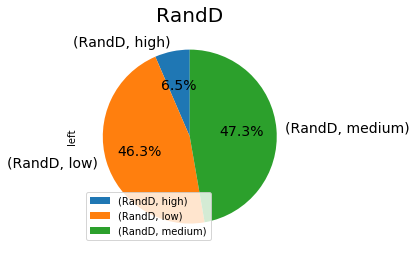

In [47]:
hr_RandD = hr[hr['sales'] == 'RandD'].sort_values('sales', ascending=False)
salary_dep_RandD  = hr_RandD.groupby(['sales', 'salary']).count()
salary_dep_RandD['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('RandD', fontsize=20)

Text(0.5, 1.0, 'accounting')

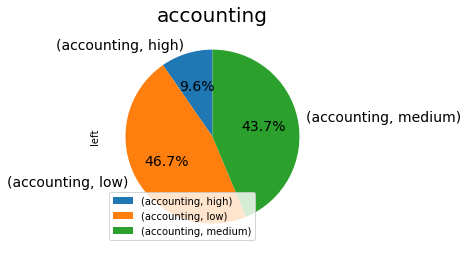

In [48]:
hr_accounting = hr[hr['sales'] == 'accounting'].sort_values('sales', ascending=False)
salary_dep_accounting = hr_accounting.groupby(['sales', 'salary']).count()
salary_dep_accounting['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('accounting', fontsize=20)

Text(0.5, 1.0, 'hr')

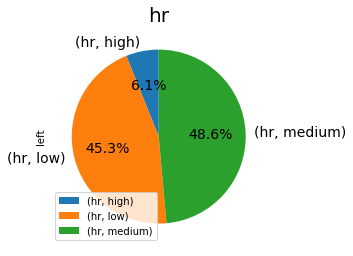

In [49]:
hr_hr = hr[hr['sales'] == 'hr'].sort_values('sales', ascending=False)
salary_dep_hr = hr_hr.groupby(['sales', 'salary']).count()
salary_dep_hr['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('hr', fontsize=20)

Text(0.5, 1.0, 'management')

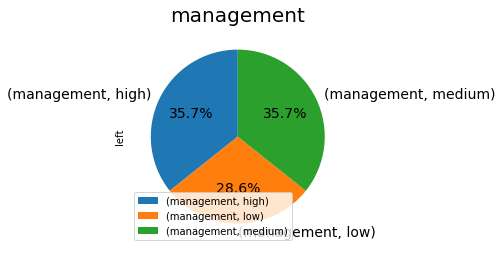

In [50]:
hr_management = hr[hr['sales'] == 'management'].sort_values('sales', ascending=False)
salary_dep_management = hr_management.groupby(['sales', 'salary']).count()
salary_dep_management['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('management', fontsize=20)

Text(0.5, 1.0, 'marketing')

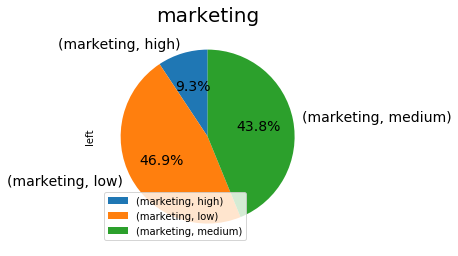

In [51]:
hr_marketing = hr[hr['sales'] == 'marketing'].sort_values('sales', ascending=False)
salary_dep_marketing = hr_marketing.groupby(['sales', 'salary']).count()
salary_dep_marketing['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('marketing', fontsize=20)

Text(0.5, 1.0, 'product_mng')

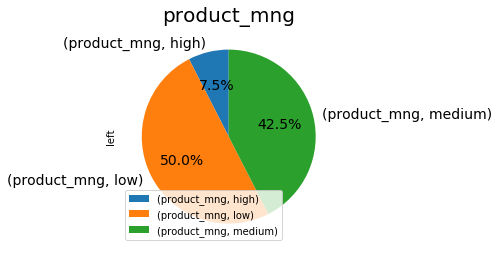

In [52]:
hr_product_mng = hr[hr['sales'] == 'product_mng'].sort_values('sales', ascending=False)
salary_dep_product_mng = hr_product_mng.groupby(['sales', 'salary']).count()
salary_dep_product_mng['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('product_mng', fontsize=20)

Text(0.5, 1.0, 'sales')

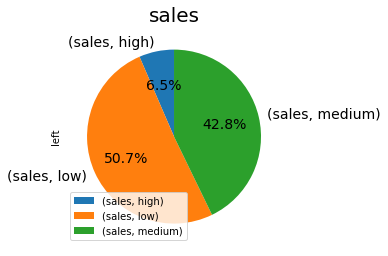

In [53]:
hr_sales = hr[hr['sales'] == 'sales'].sort_values('sales', ascending=False)
salary_dep_sales = hr_sales.groupby(['sales', 'salary']).count()
salary_dep_sales['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('sales', fontsize=20)

Text(0.5, 1.0, 'support')

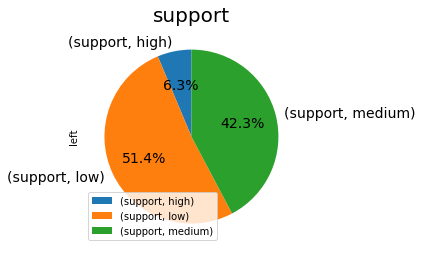

In [54]:
hr_support = hr[hr['sales'] == 'support'].sort_values('sales', ascending=False)
salary_dep_support = hr_support.groupby(['sales', 'salary']).count()
salary_dep_support['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('support', fontsize=20)

Text(0.5, 1.0, 'technical')

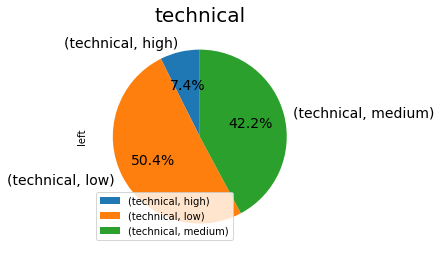

In [55]:
hr_technical = hr[hr['sales'] == 'technical'].sort_values('sales', ascending=False)
salary_dep_technical = hr_technical.groupby(['sales', 'salary']).count()
salary_dep_technical['left'].plot(kind='pie', autopct='%1.1f%%' , 
                                 startangle=90, shadow=False, legend = True, fontsize=14)
plt.title('technical', fontsize=20)

# 9.Сколько сотрудников покинули компанию.

In [56]:
# значение 1 в колонке left означает, что сотрудник уволился
hr_left = hr[hr['left'] == 1].sort_values('sales', ascending=False)
hr_left.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
1355,0.83,0.95,5,221,5,0,1,0,technical,medium
494,0.84,1.00,5,218,5,0,1,0,technical,medium
496,0.10,0.82,6,244,4,0,1,0,technical,medium
497,0.59,0.49,7,263,4,0,1,0,technical,medium
498,0.44,0.48,2,143,3,0,1,0,technical,medium


In [57]:
x = hr_left.groupby(['sales'],sort=True).size().sum()
print(x, 'сотрудник покинул компанию')

3571 сотрудник покинул компанию


# 10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

Проверим из какого департамента сотрудники увольняются чаще всего.

In [62]:
a = hr_left.groupby(['sales'],sort=True).size()
a

sales
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
dtype: int64

/home/anastacia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


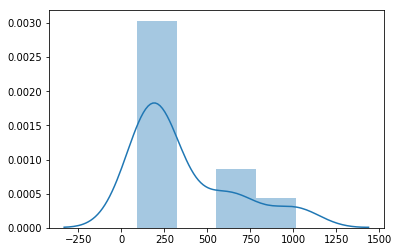

In [65]:
sns.distplot(a)

In [102]:
a.mean()

357.1

In [103]:
a.median()

209.5

Как видим, это Positive Skew.

Из департаментов sales, support, technical уходят больще всего.

Возможно, это ни о чем не говорит, посмотрим на распределение работающих сотрудников по департаментам.

In [111]:
b = hr_working.groupby(['sales'],sort=True).size()
b

sales
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
dtype: int64

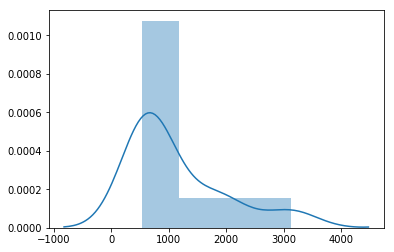

In [112]:
sns.distplot(b)

In [113]:
b.mean()

1142.8

In [114]:
b.median()

685.0

Как видим, это Negative Skew.

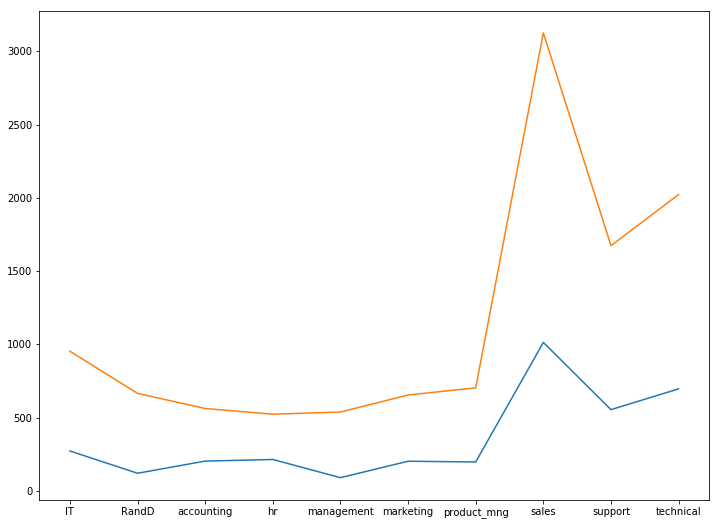

In [144]:
plt.plot(a)
plt.plot(b)


Т.е.из департаментов, где людей больше - количество увольнений выше. С департаментом это никак не связано.

Посмотрим, как распределены переменные для покинувших компанию сотрудников и как распределены переменные для работающих сотрудников

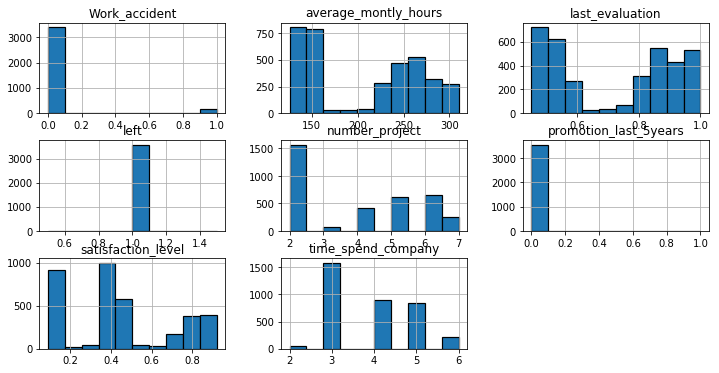

In [68]:
hr_left.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

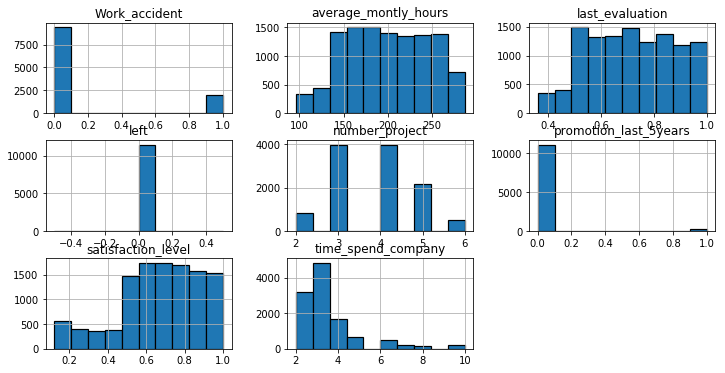

In [80]:
hr_working.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Сразу можно обратить внимание на 'promotion_last_5years'. Все уволившиеся сотрудники - ни разу не дождались повышения. Судя по работающим сотрудникам - с повышениями сложно и у них. За нулевую гипотезу возьмем утверждение, что среднее значение у выборок по данному критерию у работающих и уволившихся равно. Альтернативная гипотеза - средние значения - не равны.

In [90]:
ttest(hr_left['promotion_last_5years'], hr_working['promotion_last_5years'])

Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)

Видим высокий p-value. Это означает, что нулевая гипотеза не верна. Вывод: на уволившихся в некоторой степени повлияло отсутствие повышений.

Сравним средние значения по другим переменным.


In [93]:
ttest(hr_left['satisfaction_level'], hr_working['satisfaction_level'])

Ttest_indResult(statistic=-51.61280155890101, pvalue=0.0)

In [94]:
ttest(hr_left['last_evaluation'], hr_working['last_evaluation'])


Ttest_indResult(statistic=0.8042416167796328, pvalue=0.4212701963735056)

In [95]:
ttest(hr_left['number_project'], hr_working['number_project'])

Ttest_indResult(statistic=2.9138564358459607, pvalue=0.0035752138709418788)

In [96]:
ttest(hr_left['average_montly_hours'], hr_working['average_montly_hours'])

Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)

In [97]:
ttest(hr_left['time_spend_company'], hr_working['time_spend_company'])

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

In [98]:
ttest(hr_left['Work_accident'], hr_working['Work_accident'])

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)

Итого на основе результата ttest вывод: на уход сотрудников влияет: отсутствие повышения, среднее количество часов работы у уволившихся было больше (207.419210), чем у работающих (199.060203).
        